In [22]:
import sys
print('Python version', sys.version_info)

# To lead .bag files
import rosbag
# To convert image data to numpy array via OpenCV
from cv_bridge import CvBridge

import logging
import numpy as np
import cv2
from utils import pim

('Python version', sys.version_info(major=2, minor=7, micro=13, releaselevel='final', serial=0))


In [34]:
# Define ROS bag topci in which can be found images
TOPIC_img = '/image_raw'
FRAME_TO_SHOW = 4  # Later plot 4 frames from ROS bag
STEP = 100  # Later plot every 10th frame from ROS bag

test_bag = '../Datasets/Didi-Training-Release-1/approach_1.bag'

# Simple example of how to load image from ROS .bag

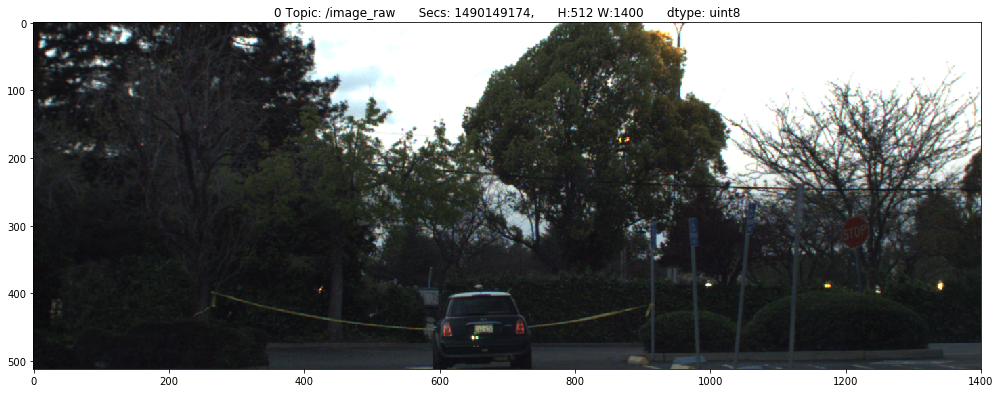

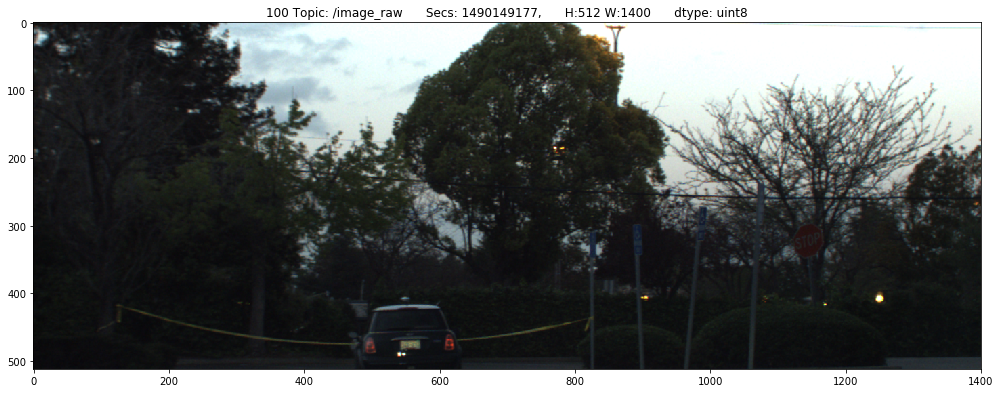

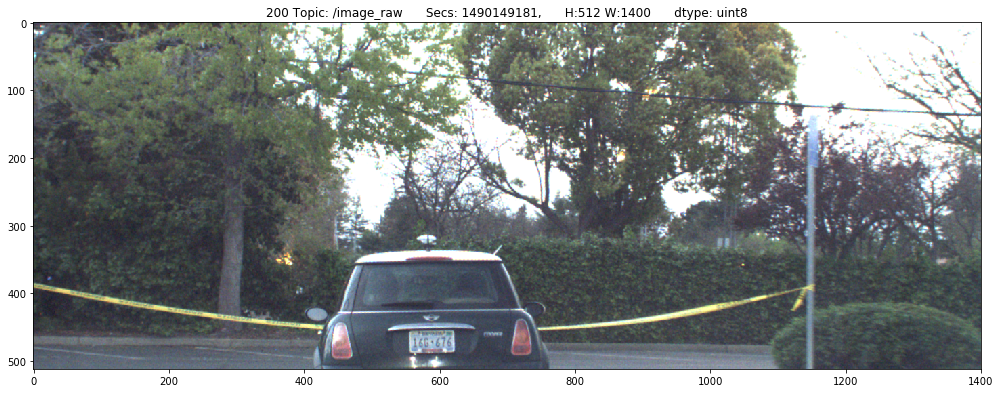

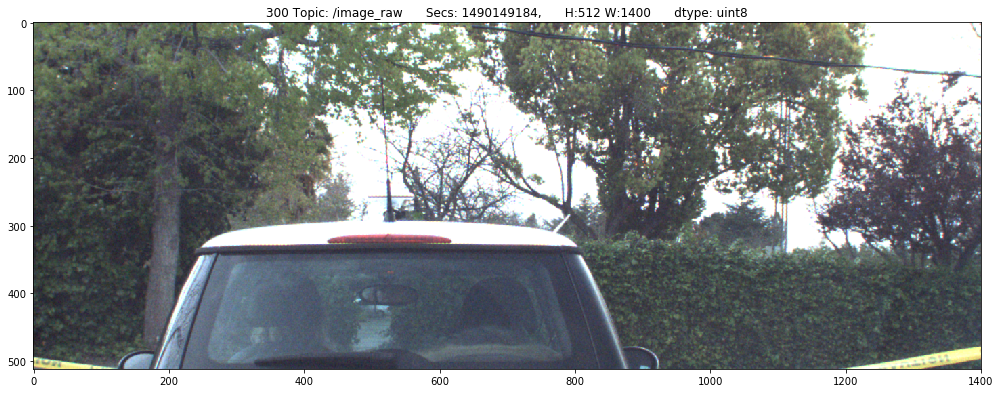

In [36]:
bag = rosbag.Bag(test_bag, 'r')

iterator = bag.read_messages(topics=TOPIC_img) # select message (topic, msg, time)

# Create bridge between ROS and OpenCV
bridge = CvBridge()
counter = 0

for i, (topic, msg, t) in enumerate(iterator):
    ###### Plot every 10th frame ######
    if i % STEP == 0:
        img = np.asarray(bridge.imgmsg_to_cv2(msg, 'bgr8'))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        pim([img], ['{} Topic: {}      Secs: {},      H:{} W:{}      dtype: {}'.format(i, topic, t.secs,
                                                                                       msg.height,
                                                                                       msg.width,
                                                                                       img.dtype)])
        counter += 1
    if counter == FRAME_TO_SHOW:
        break
bag.close()